# Exploratory Data Analysis

In [53]:
from glob import glob
import pandas as pd
from IPython.display import display, HTML

images = glob("./iNaturalist/images/Poison Ivy/*.j*")
labels = glob("./iNaturalist/images/Poison Ivy/*.txt")
labels.remove("./iNaturalist/images/Poison Ivy\\classes.txt")
n_images = len(images)
n_labeled = len(labels)
print(str(round(n_labeled / n_images * 100, 1)) + "% of the images are labeled")

2.0% of the images are labeled


In [54]:
n_objects = {}
max_record = 0
for f in labels:
    objects = sum(1 for line in open(f))
    n_objects[objects] = n_objects.get(objects, 0) + 1
    record_id = int(f.split("\\")[-1].split(".txt")[0])
    if record_id > max_record:
        max_record = record_id


<AxesSubplot:title={'center':'Images by Number of Poison Ivy "Plants"'}, xlabel='Poison Ivy'>

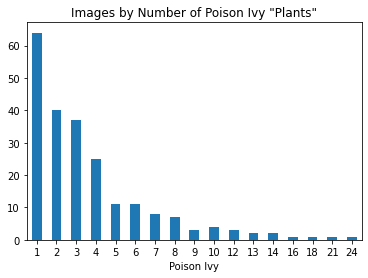

In [55]:
n_objects_df = pd.DataFrame.from_dict(n_objects, orient="index", columns=["Images"]).reset_index().sort_values("index").rename(columns={"index":"Poison Ivy"}).reset_index(drop=True)
n_objects_df.plot.bar(x="Poison Ivy", y="Images", rot=0, legend=False, title="Images by Number of Poison Ivy \"Plants\"")

In [57]:
display(HTML(n_objects_df.to_html(index=False)))

Poison Ivy,Images
1,64
2,40
3,37
4,25
5,11
6,11
7,8
8,7
9,3
10,4
